In [162]:
import pandas as pd
import numpy as np
import re

In [163]:
data=pd.read_csv('fifa.csv')
data.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [164]:
def clean_value(x):
    
    if isinstance(x,str):
        a=x.replace('€','')
        
        if 'M' in a:
            a=float(a.replace('M', ''))*1000000
        elif 'K' in a:
            a=float(a.replace('K', ''))*1000
        return float(a)
       
data['Value'] = data['Value'].apply(clean_value)

In [165]:
# def clean_wage(x):
    
#     if isinstance(x,str):
#         return(x.replace('K', '').replace('M', '').replace('€',''))
#     return(x)

data['Wage'] = data['Wage'].apply(clean_value)

In [166]:
def clean_date(x):
    l=[]
    if isinstance(x,str):
        l=x.split(", ")
        x=l[-1]
    return(x)

data['Joined']=data['Joined'].replace(np.nan,0)
data['Joined'] = data['Joined'].apply(clean_date).astype('int')

In [167]:
import datetime
data['Contract Valid Until']=pd.to_datetime(data['Contract Valid Until'])
data['year'] = pd.DatetimeIndex(data['Contract Valid Until']).year.astype(str)

In [168]:
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


data['Height'] = data['Height'].apply(clean_height)

In [169]:
def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

data['Weight'] = data['Weight'].apply(clean_weight).astype('float')

In [170]:
data['year']

0        2021.0
1        2022.0
2        2022.0
3        2020.0
4        2023.0
          ...  
18202    2019.0
18203    2020.0
18204    2021.0
18205    2019.0
18206    2019.0
Name: year, Length: 18207, dtype: object

In [171]:
# def clean_release(x):
    
#     if isinstance(x,str):
#         return(x.replace('K', '').replace('M', '').replace('€',''))
#     return(x)

data['Release Clause'] = data['Release Clause'].apply(clean_value)
data['Release Clause']=data['Release Clause'].replace(np.nan,data['Release Clause'].mean())

In [49]:
df=data.drop(['ID','Photo','Nationality','Flag','Club','Club Logo','Jersey Number'],axis=1, inplace=False)
df

,Name,Age,Overall,Potential,Value,Wage,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,110500000.0,565000.0,Left,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,Right,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,92,93,118500000.0,290000.0,Right,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,91,93,72000000.0,260000.0,Right,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,91,92,102000000.0,355000.0,Right,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,60000.0,1000.0,Right,1.0,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,N. Christoffersson,19,47,63,60000.0,1000.0,Right,1.0,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,B. Worman,16,47,67,60000.0,1000.0,Right,1.0,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,D. Walker-Rice,17,47,66,60000.0,1000.0,Right,1.0,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [50]:
df.drop(['Preferred Foot','Weak Foot','Loaned From'],axis=1,inplace=True)

In [51]:
df

,Name,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Work Rate,Body Type,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,94,94,110500000.0,565000.0,5.0,4.0,Medium/ Medium,Messi,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,Cristiano Ronaldo,33,94,94,77000000.0,405000.0,5.0,5.0,High/ Low,C. Ronaldo,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,Neymar Jr,26,92,93,118500000.0,290000.0,5.0,5.0,High/ Medium,Neymar,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,De Gea,27,91,93,72000000.0,260000.0,4.0,1.0,Medium/ Medium,Lean,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,K. De Bruyne,27,91,92,102000000.0,355000.0,4.0,4.0,High/ High,Normal,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,47,65,60000.0,1000.0,1.0,2.0,Medium/ Medium,Lean,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,143000.0
18203,N. Christoffersson,19,47,63,60000.0,1000.0,1.0,2.0,Medium/ Medium,Normal,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,113000.0
18204,B. Worman,16,47,67,60000.0,1000.0,1.0,2.0,Medium/ Medium,Normal,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,165000.0
18205,D. Walker-Rice,17,47,66,60000.0,1000.0,1.0,2.0,Medium/ Medium,Lean,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,143000.0


In [52]:
import seaborn as sns

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 50 columns):
Name                        18207 non-null object
Age                         18207 non-null int64
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Value                       18207 non-null float64
Wage                        18207 non-null float64
International Reputation    18207 non-null float64
Skill Moves                 18207 non-null float64
Work Rate                   18207 non-null object
Body Type                   18207 non-null object
Position                    18207 non-null object
Joined                      18207 non-null int32
Contract Valid Until        18207 non-null object
Height                      18207 non-null float64
Weight                      18207 non-null float64
Crossing                    18207 non-null float64
Finishing                   18207 non-null float64
HeadingAccuracy             18207 non

In [158]:
df['Weight'].fillna((df['Weight'].mean()), inplace = True) 
df['International Reputation'].fillna(df['International Reputation'].mean(), inplace = True) 
df['Skill Moves'].fillna(df['Skill Moves'].mean(), inplace = True) 
df['Work Rate'].fillna('Not available', inplace = True) 
df['Body Type'].fillna('Not available', inplace = True) 
df['Position'].fillna('Not available', inplace = True) 
df['Joined'].fillna('Not available', inplace = True) 
df['Contract Valid Until'].fillna('Not available', inplace = True) 
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True) 
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True) 
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True) 

In [159]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True) 
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True) 
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True) 
df['Curve'].fillna(df['FKAccuracy'].mean(), inplace = True) 
df['FKAccuracy'].fillna(df['FKAccuracy'].mean(), inplace = True) 
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True) 
df['Joined'].fillna(df['Joined'].mean(), inplace = True) 
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True) 
df['Acceleration'].fillna(df['Acceleration'].mean(), inplace = True) 
df['SprintSpeed'].fillna(df['SprintSpeed'].mean(), inplace = True) 
df['Agility'].fillna(df['Agility'].mean(), inplace = True) 

In [55]:
df['Reactions'].fillna(df['Reactions'].mean(), inplace = True) 
df['Balance'].fillna(df['Balance'].mean(), inplace = True) 
df['ShotPower'].fillna(df['ShotPower'].mean(), inplace = True) 
df['Jumping'].fillna(df['Jumping'].mean(), inplace = True) 
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True) 
df['Strength'].fillna(df['Strength'].mean(), inplace = True) 
df['LongShots'].fillna(df['LongShots'].mean(), inplace = True) 
df['Aggression'].fillna(df['Aggression'].mean(), inplace = True) 
df['Interceptions'].fillna(df['Interceptions'].mean(), inplace = True) 
df['SprintSpeed'].fillna(df['Positioning'].mean(), inplace = True) 
df['Agility'].fillna(df['Vision'].mean(), inplace = True) 
df['Penalties'].fillna(df['Penalties'].mean(), inplace = True) 
df['Composure'].fillna(df['Composure'].mean(), inplace = True) 

In [56]:
df['Marking'].fillna(df['Marking'].mean(), inplace = True) 
df['SlidingTackle'].fillna(df['SlidingTackle'].mean(), inplace = True) 
df['StandingTackle'].fillna(df['StandingTackle'].mean(), inplace = True) 
df['GKDiving'].fillna(df['GKDiving'].mean(), inplace = True) 
df['Stamina'].fillna(df['Stamina'].mean(), inplace = True) 
df['GKHandling'].fillna(df['GKHandling'].mean(), inplace = True) 
df['GKKicking'].fillna(df['GKKicking'].mean(), inplace = True) 
df['GKPositioning'].fillna(df['GKPositioning'].mean(), inplace = True) 
df['GKReflexes'].fillna(df['GKReflexes'].mean(), inplace = True) 
df['Release Clause'].fillna(df['Release Clause'].mean(), inplace = True) 
df['Positioning'].fillna(df['Positioning'].mean(), inplace = True) 
df['Vision'].fillna(df['Vision'].mean(), inplace = True) 

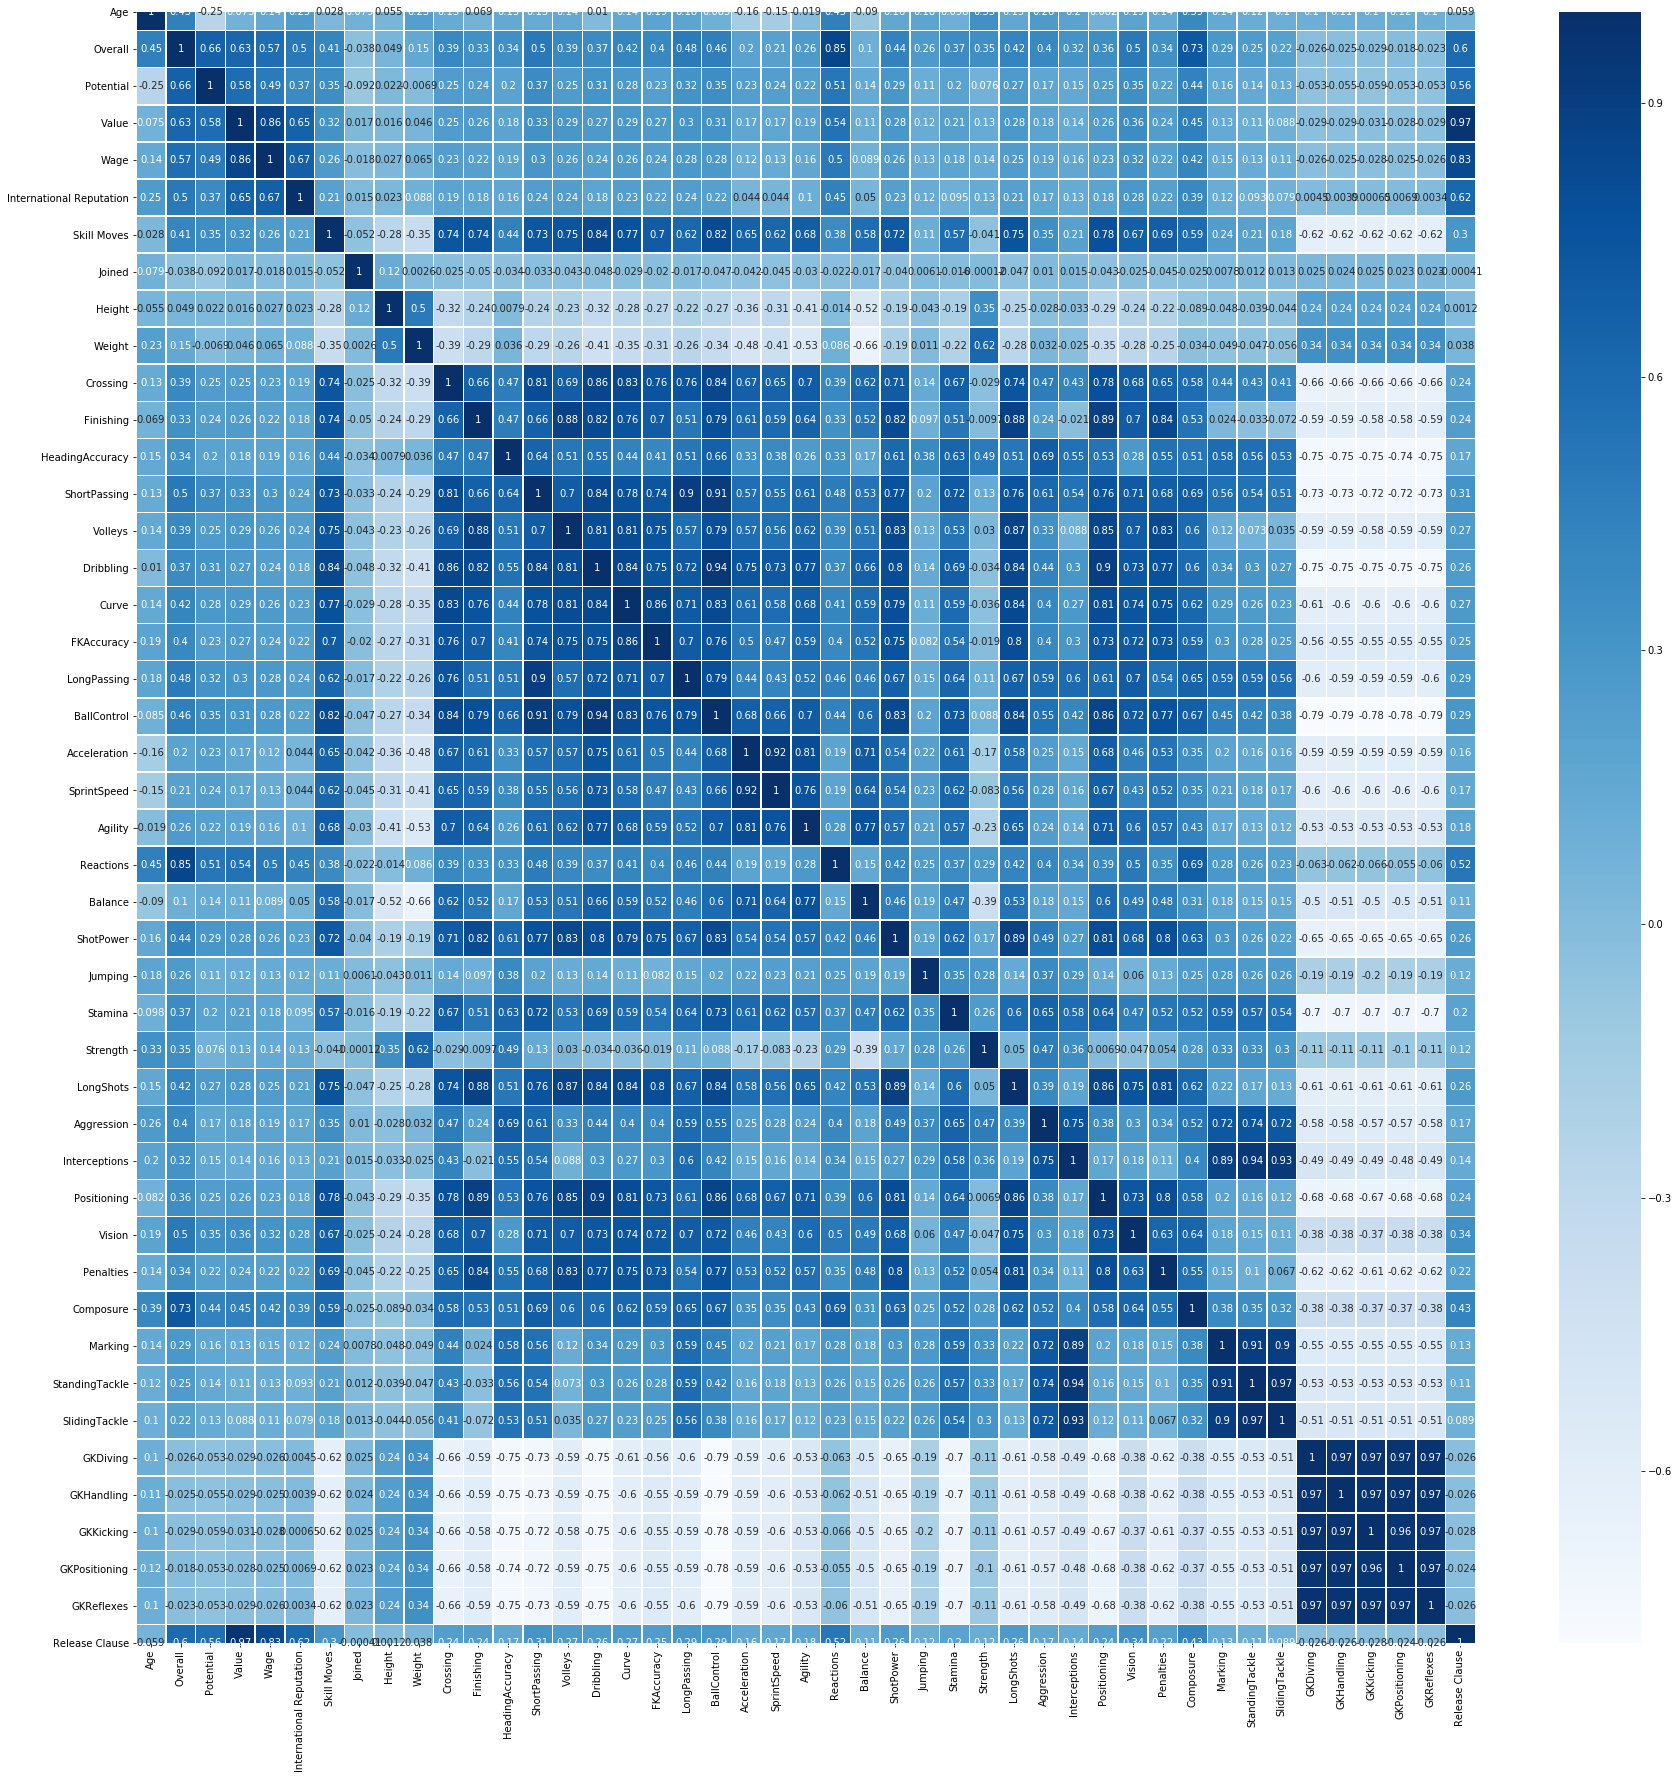

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), linewidths=0.5, cmap='Blues', annot=True)

In [59]:
df.corr()

,Age,Overall,Potential,Value,Wage,International Reputation,Skill Moves,Joined,Height,Weight,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Age,1.000000,0.452350,-0.253312,0.075022,0.141145,0.253464,0.027616,0.079418,0.055145,0.229940,...,0.390560,0.142647,0.119603,0.102967,0.101157,0.106293,0.104839,0.116264,0.103190,0.058672
Overall,0.452350,1.000000,0.660939,0.627085,0.571926,0.499243,0.414257,-0.037976,0.049082,0.154557,...,0.727293,0.286363,0.252503,0.222700,-0.025924,-0.025049,-0.029358,-0.017666,-0.023264,0.597821
Potential,-0.253312,0.660939,1.000000,0.576218,0.486413,0.372375,0.353703,-0.092268,0.021867,-0.006935,...,0.439279,0.162531,0.143326,0.128766,-0.053357,-0.054581,-0.058964,-0.052502,-0.053252,0.562346
Value,0.075022,0.627085,0.576218,1.000000,0.858442,0.653059,0.315595,0.017357,0.016024,0.045934,...,0.450271,0.133838,0.108383,0.087720,-0.028591,-0.028889,-0.030917,-0.027887,-0.028539,0.972041
Wage,0.141145,0.571926,0.486413,0.858442,1.000000,0.668515,0.263158,-0.017983,0.027072,0.064764,...,0.419521,0.145568,0.126268,0.111005,-0.025590,-0.025173,-0.028320,-0.025484,-0.025987,0.828161
International Reputation,0.253464,0.499243,0.372375,0.653059,0.668515,1.000000,0.208153,0.014710,0.022884,0.088340,...,0.392787,0.115208,0.092846,0.079176,0.004526,0.003942,0.000651,0.006904,0.003444,0.620863
Skill Moves,0.027616,0.414257,0.353703,0.315595,0.263158,0.208153,1.000000,-0.051791,-0.277355,-0.351209,...,0.586836,0.241428,0.210517,0.178607,-0.621675,-0.619755,-0.616990,-0.618853,-0.621925,0.297471
Joined,0.079418,-0.037976,-0.092268,0.017357,-0.017983,0.014710,-0.051791,1.000000,0.124321,0.002620,...,-0.025005,0.007751,0.011557,0.013400,0.024582,0.024263,0.024825,0.022699,0.023109,-0.000413
Height,0.055145,0.049082,0.021867,0.016024,0.027072,0.022884,-0.277355,0.124321,1.000000,0.495121,...,-0.089084,-0.048374,-0.038627,-0.043870,0.236574,0.236707,0.235384,0.237442,0.237914,0.001204
Weight,0.229940,0.154557,-0.006935,0.045934,0.064764,0.088340,-0.351209,0.002620,0.495121,1.000000,...,-0.034444,-0.049356,-0.046835,-0.056164,0.340034,0.339024,0.337717,0.342178,0.341135,0.038103


In [60]:
data['Position']

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [61]:
df1=df.drop(['Age','Overall','Potential','Value','Wage','Height','Weight','Name'],axis=1)
df1=df1.drop(['Work Rate','Body Type','Joined','Contract Valid Until','International Reputation','Release Clause'],axis=1)
df1

,Skill Moves,Position,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,4.0,RF,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,5.0,ST,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,5.0,LW,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,1.0,GK,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,4.0,RCM,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,2.0,CM,34.0,38.0,40.0,49.0,25.0,42.0,30.0,34.0,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,2.0,ST,23.0,52.0,52.0,43.0,36.0,39.0,32.0,20.0,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,2.0,ST,25.0,40.0,46.0,38.0,38.0,45.0,38.0,27.0,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,2.0,RW,44.0,50.0,39.0,42.0,40.0,51.0,34.0,32.0,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


In [62]:
df2=df1.groupby(['Position']).mean()
df2

,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Position,,,,,,,,,,,,,,,,,,,,,
CAM,2.963466,59.675365,59.442589,49.007307,67.524008,55.668058,68.109603,61.335073,58.118998,62.546973,...,58.136743,63.111691,40.631524,41.392484,39.170146,10.293319,10.623173,10.670146,10.491649,10.367432
CB,2.017998,38.934196,29.512373,63.931384,55.066367,31.600675,42.337458,34.879078,33.668166,49.297525,...,40.699100,56.271654,63.313836,66.222722,63.826772,10.467942,10.466254,10.501687,10.613611,10.538808
CDM,2.325949,52.126582,44.408228,57.164557,67.690928,43.359705,59.481013,49.934599,48.233122,64.148734,...,50.267932,61.020042,63.200422,65.624473,62.674051,10.619198,10.579114,10.574895,10.578059,10.565401
CF,2.932432,54.797297,64.608108,54.040541,63.378378,58.864865,68.675676,59.229730,52.797297,54.202703,...,59.351351,60.959459,32.621622,28.945946,26.054054,9.432432,9.567568,9.945946,9.972973,10.270270
CM,2.537303,54.666428,49.896700,51.724534,67.530846,47.966284,62.634864,54.208034,51.428264,64.156385,...,51.952654,59.914634,54.800574,57.218795,54.579627,10.368006,10.377331,10.431851,10.558824,10.431133
GK,1.000000,14.257284,12.016296,14.368889,27.269136,12.397037,13.856296,14.707654,14.464198,25.808395,...,20.007407,45.122469,15.225185,14.141235,14.072099,65.323951,62.868148,61.477531,63.047407,66.101728
LAM,3.333333,69.285714,63.714286,54.761905,71.000000,62.952381,73.047619,64.714286,60.523810,64.714286,...,65.190476,69.857143,29.571429,34.666667,30.000000,11.285714,11.285714,10.380952,9.476190,11.333333
LB,2.422844,63.408472,39.929652,55.610439,61.326778,39.282905,61.595310,52.621785,45.563540,55.301815,...,45.866112,58.137670,62.251891,65.552194,64.704236,10.683812,10.338880,10.456884,10.512859,10.567322
LCB,2.046296,44.083333,32.305556,68.277778,60.256173,33.410494,47.300926,39.067901,36.373457,55.564815,...,43.125000,61.989198,67.672840,69.989198,67.762346,10.598765,10.898148,10.509259,10.611111,10.436728


In [63]:
for index, val in df2.iterrows():
    print('Position {}: {}, {}, {}'.format(index, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Strength, Jumping, StandingTackle
Position CDM: Stamina, Aggression, Strength
Position CF: Agility, Balance, Acceleration
Position CM: Balance, ShortPassing, Agility
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, SprintSpeed
Position LB: SprintSpeed, Acceleration, Stamina
Position LCB: Strength, Jumping, StandingTackle
Position LCM: Stamina, ShortPassing, Balance
Position LDM: Stamina, ShortPassing, Strength
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, SprintSpeed, Agility
Position LS: SprintSpeed, Strength, Acceleration
Position LW: Acceleration, SprintSpeed, Agility
Position LWB: SprintSpeed, Acceleration, Stamina
Position Not available: Acceleration, SprintSpeed, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: SprintSpeed, Stamina, Acceleration
Position RCB: Strength, Jumping, Aggression
Position RCM: Stamina, ShortPassing, Agility
Position RDM: Sta

In [64]:
l=[]
l=df2.columns
l

Index(['Skill Moves', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [65]:
l1=[]
df3=df2.T
l1=df3.columns
l1

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'Not available', 'RAM', 'RB', 'RCB',
       'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object', name='Position')

In [66]:

for position, skills in df2.iterrows():
    d=[skills.nlargest(3)]
    print(position)
    print(d)
    

CAM
[Balance         73.248434
Agility         72.637787
Acceleration    70.680585
Name: CAM, dtype: float64]
CB
[Strength          74.352081
Jumping           69.268841
StandingTackle    66.222722
Name: CB, dtype: float64]
CDM
[Stamina       70.047468
Aggression    68.577004
Strength      68.354430
Name: CDM, dtype: float64]
CF
[Agility         74.608108
Balance         73.756757
Acceleration    73.324324
Name: CF, dtype: float64]
CM
[Balance         69.761836
ShortPassing    67.530846
Agility         67.228838
Name: CM, dtype: float64]
GK
[GKReflexes       66.101728
GKDiving         65.323951
GKPositioning    63.047407
Name: GK, dtype: float64]
LAM
[Agility        76.952381
Balance        75.380952
SprintSpeed    74.047619
Name: LAM, dtype: float64]
LB
[SprintSpeed     71.949319
Acceleration    71.901664
Stamina         71.512103
Name: LB, dtype: float64]
LCB
[Strength          78.098765
Jumping           71.337963
StandingTackle    69.989198
Name: LCB, dtype: float64]
LCM
[Stamina  

In [172]:
data['Weight'].fillna((data['Weight'].mean()), inplace = True) 
data['International Reputation'].fillna(data['International Reputation'].mean(), inplace = True) 
data['Skill Moves'].fillna(data['Skill Moves'].mean(), inplace = True) 
data['Work Rate'].fillna('Not available', inplace = True) 
data['Body Type'].fillna('Not available', inplace = True) 
data['Position'].fillna('Not available', inplace = True) 
data['Joined'].fillna('Not available', inplace = True) 
data['Contract Valid Until'].fillna('Not available', inplace = True) 
data['Crossing'].fillna(data['Crossing'].mean(), inplace = True) 
data['Finishing'].fillna(data['Finishing'].mean(), inplace = True) 
data['HeadingAccuracy'].fillna(data['HeadingAccuracy'].mean(), inplace = True) 

In [173]:
data['ShortPassing'].fillna(data['ShortPassing'].mean(), inplace = True) 
data['Volleys'].fillna(data['Volleys'].mean(), inplace = True) 
data['Dribbling'].fillna(data['Dribbling'].mean(), inplace = True) 
data['Curve'].fillna(data['FKAccuracy'].mean(), inplace = True) 
data['FKAccuracy'].fillna(data['FKAccuracy'].mean(), inplace = True) 
data['LongPassing'].fillna(data['LongPassing'].mean(), inplace = True) 
data['Joined'].fillna(data['Joined'].mean(), inplace = True) 
data['BallControl'].fillna(data['BallControl'].mean(), inplace = True) 
data['Acceleration'].fillna(data['Acceleration'].mean(), inplace = True) 
data['SprintSpeed'].fillna(data['SprintSpeed'].mean(), inplace = True) 
data['Agility'].fillna(data['Agility'].mean(), inplace = True) 

In [174]:
data['Reactions'].fillna(data['Reactions'].mean(), inplace = True) 
data['Balance'].fillna(data['Balance'].mean(), inplace = True) 
data['ShotPower'].fillna(data['ShotPower'].mean(), inplace = True) 
data['Jumping'].fillna(data['Jumping'].mean(), inplace = True) 
data['Stamina'].fillna(data['Stamina'].mean(), inplace = True) 
data['Strength'].fillna(data['Strength'].mean(), inplace = True) 
data['LongShots'].fillna(data['LongShots'].mean(), inplace = True) 
data['Aggression'].fillna(data['Aggression'].mean(), inplace = True) 
data['Interceptions'].fillna(data['Interceptions'].mean(), inplace = True) 
data['SprintSpeed'].fillna(data['Positioning'].mean(), inplace = True) 
data['Agility'].fillna(data['Vision'].mean(), inplace = True) 
data['Penalties'].fillna(data['Penalties'].mean(), inplace = True) 
data['Composure'].fillna(data['Composure'].mean(), inplace = True) 
data['year'].fillna('Not available', inplace = True) 

In [175]:
data['Marking'].fillna(data['Marking'].mean(), inplace = True) 
data['SlidingTackle'].fillna(data['SlidingTackle'].mean(), inplace = True) 
data['StandingTackle'].fillna(data['StandingTackle'].mean(), inplace = True) 
data['GKDiving'].fillna(data['GKDiving'].mean(), inplace = True) 
data['Stamina'].fillna(data['Stamina'].mean(), inplace = True) 
data['GKHandling'].fillna(data['GKHandling'].mean(), inplace = True) 
data['GKKicking'].fillna(data['GKKicking'].mean(), inplace = True) 
data['GKPositioning'].fillna(data['GKPositioning'].mean(), inplace = True) 
data['GKReflexes'].fillna(data['GKReflexes'].mean(), inplace = True) 
data['Release Clause'].fillna(data['Release Clause'].mean(), inplace = True) 
data['Positioning'].fillna(data['Positioning'].mean(), inplace = True) 
data['Vision'].fillna(data['Vision'].mean(), inplace = True) 

In [177]:
striker=data[(data['Position']=='ST')&(data['year']<='2020')][['Name','Overall','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
striker

,Name,Overall,Potential,Value,Release Clause
297,M. Kruse,82,82,21500000.0,36600000.0
315,David Villa,82,82,8000000.0,12000000.0
316,Aduriz,82,82,8000000.0,16800000.0


In [178]:
LF=data[(data['Position']=='LF')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
LF

,Name,Overall,Position,Potential,Value,Release Clause
1379,S. Blanco,76,LF,76,7500000.0,11300000.0
4592,P. Ebert,71,LF,71,2100000.0,3300000.0
5191,Gabriel Xavier,70,LF,74,2300000.0,3100000.0


In [179]:
RF=data[(data['Position']=='RF')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
RF

,Name,Overall,Position,Potential,Value,Release Clause
528,D. Valeri,80,RF,80,11500000.0,1.730000e+07
890,L. Podolski,78,RF,78,6500000.0,8.100000e+06
3759,C. Falletti,72,RF,75,3900000.0,4.585061e+06


In [180]:
CAM=data[(data['Position']=='CAM')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
CAM

,Name,Overall,Position,Potential,Value,Release Clause
166,Anderson Talisca,83,CAM,90,36500000.0,4.585061e+06
289,A. Ramsey,82,CAM,83,25000000.0,4.940000e+07
418,M. Almirón,80,CAM,84,19500000.0,3.070000e+07


In [181]:
LM=data[(data['Position']=='LM')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
LM

,Name,Overall,Position,Potential,Value,Release Clause
86,Koke,85,LM,86,45000000.0,95600000.0
94,Y. Brahimi,85,LM,85,39000000.0,78000000.0
221,F. Ribéry,83,LM,83,11500000.0,19000000.0


In [182]:
CM=data[(data['Position']=='CM')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
CM

,Name,Overall,Position,Potential,Value,Release Clause
168,A. Rabiot,83,CM,87,33000000.0,63500000.0
220,M. Dembélé,83,CM,83,24000000.0,44400000.0
219,Cesc Fàbregas,83,CM,83,22000000.0,40700000.0


In [183]:
RM=data[(data['Position']=='RM')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
RM

,Name,Overall,Position,Potential,Value,Release Clause
154,A. Robben,84,RM,84,15500000.0,25600000.0
211,Juan Mata,83,RM,83,24500000.0,45300000.0
288,Marlos,82,RM,82,21000000.0,44100000.0


In [184]:
LB=data[(data['Position']=='LB')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
LB

,Name,Overall,Position,Potential,Value,Release Clause
106,Filipe Luís,85,LB,85,21500000.0,44100000.0
520,Nacho Monreal,80,LB,80,8000000.0,15200000.0
717,A. Young,79,LB,79,7000000.0,13000000.0


In [185]:
RB=data[(data['Position']=='RB')&(data['year']<='2020')][['Name','Overall','Position','Potential','Value','Release Clause']].sort_values(by='Overall',ascending=False).head(3)
RB

,Name,Overall,Position,Potential,Value,Release Clause
314,Dani Alves,82,RB,82,4800000.0,8.900000e+06
354,S. Vrsaljko,81,RB,84,18000000.0,4.585061e+06
543,Juanfran,80,RB,80,5500000.0,1.130000e+07


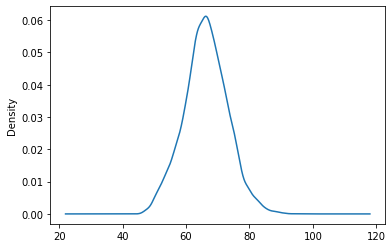

In [191]:
data['Overall'].plot(kind='kde')

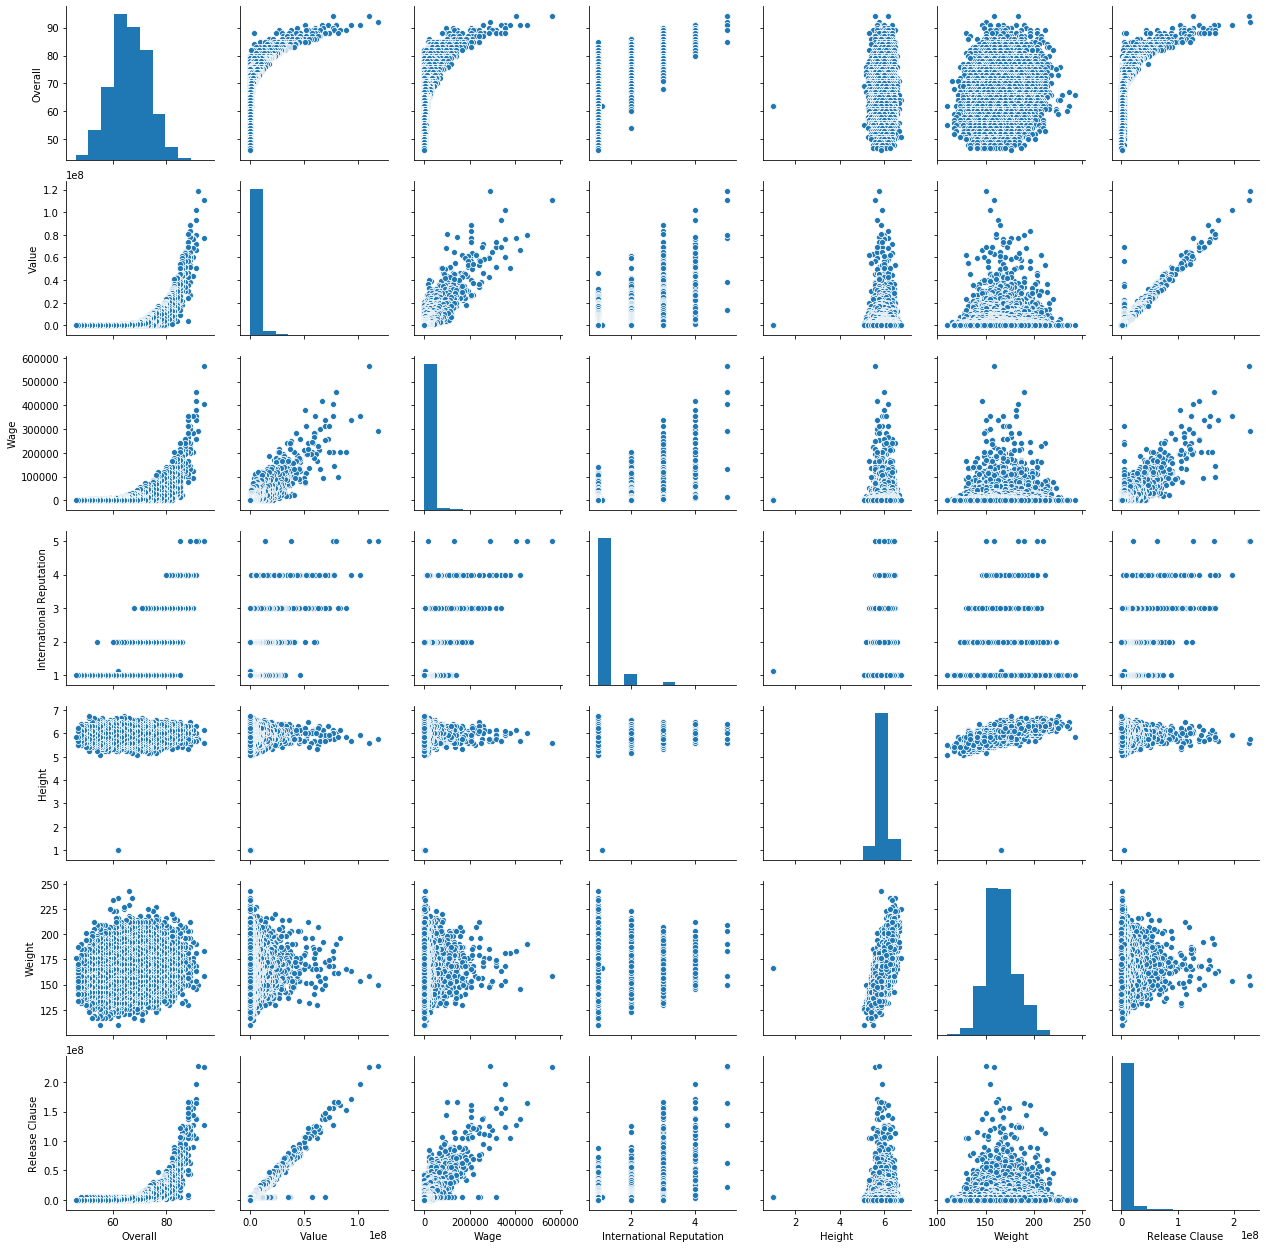

In [194]:
sns.pairplot(data[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])

In [196]:
data1=data.sort_values(by='Overall',ascending=False).head(20)
data1

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,year
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0,2021.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0,2022.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0,2022.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0,2020.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0,2023.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0,2020.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0,2020.0
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164000000.0,2021.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0,2020.0
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0,2019.0


In [199]:
print("The average wage of top 20 players by overall rating is=",data1['Wage'].mean())

The average wage of top 20 players by overall rating is= 294950.0


In [200]:
print("The average age of top 20 players by overall rating is=",data1['Age'].mean())

The average age of top 20 players by overall rating is= 29.55


In [205]:
data3=data[['Overall','Value']]
data3.corr()

,Overall,Value
Overall,1.000000,0.627085
Value,0.627085,1.000000


In [206]:
data4=data[['Name','Position','Overall']]
data4

,Name,Position,Overall
0,L. Messi,RF,94
1,Cristiano Ronaldo,ST,94
2,Neymar Jr,LW,92
3,De Gea,GK,91
4,K. De Bruyne,RCM,91
...,...,...,...
18202,J. Lundstram,CM,47
18203,N. Christoffersson,ST,47
18204,B. Worman,ST,47
18205,D. Walker-Rice,RW,47


In [221]:
data5=data4.groupby(['Position','Name']).sum()
data5

Overall
Position Name                 
CAM      A. Adouyev         62
         A. Ajagun          69
         A. Aktas           54
         A. Al Fraidi       67
         A. Al Nazera       62
...                        ...
ST       Zé Turbo           67
         Álex López         66
         Álvaro            140
         Ángel              79
         Éder               75

[18097 rows x 1 columns]

In [232]:
a=data5.loc[l1[0]].sort_values('Overall',ascending=False).head(5)
for i in range(1,len(l1)):
    b=data5.loc[l1[i]].sort_values('Overall',ascending=False).head(5)
    a=pd.concat([a,b])

In [226]:
len(l1)

28

In [229]:
l1

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM', 'LDM',
       'LF', 'LM', 'LS', 'LW', 'LWB', 'Not available', 'RAM', 'RB', 'RCB',
       'RCM', 'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'],
      dtype='object', name='Position')

In [240]:
a

,Overall
Name,
A. Miranchuk,151
G. Fernández,147
J. Hofmann,142
C. Villanueva,138
J. Vela,134
...,...
A. Rodríguez,197
J. Hernández,154
Joselu,146


In [296]:
dup1=a[a.duplicated(keep=False)]

In [297]:
dup2=dup1.drop_duplicates()

In [298]:
dup2.count()

Overall    29
dtype: int64

In [299]:
dup2

,Overall
Name,
G. Fernández,147
J. Hofmann,142
C. Villanueva,138
J. Vela,134
F. Meza,144
A. Ba,140
M. Martínez,137
E. Godoy,136
Luis Alberto,82
